In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer

In [2]:
#df = pd.read_csv("C:\\Users\\hlmq\\OneDrive - Chevron\\Desktop\\Projects\\Twitter News\\sample tweets\\1000_python_tweets.csv")
df = pd.read_csv("C:\\Users\\t_zim\\Desktop\\Projects\\Twitter_Project\\1000_python_tweets.csv")

In [3]:
# CountWordFrequency

#Create DTM
cv = CountVectorizer(ngram_range = (1,3), stop_words='english')
dtm = cv.fit_transform(df['tweet'])
words = np.array(cv.get_feature_names_out())

#Look at top 15 most frequent words
freqs=dtm.sum(axis=0).A.flatten()
index=np.argsort(freqs)[-10:]

# Construct dataframe
WordFreq = pd.DataFrame.from_records(list(zip(words[index], freqs[index])))
WordFreq.columns = ['Word', 'Frequency']

In [4]:
WordFreq.head()

,Word,Frequency
0,100daysofcode,49
1,looking,53
2,python https,54
3,javascript,63
4,ai,67


In [6]:
import panel as pn
import pandas as pd
import datetime as dt

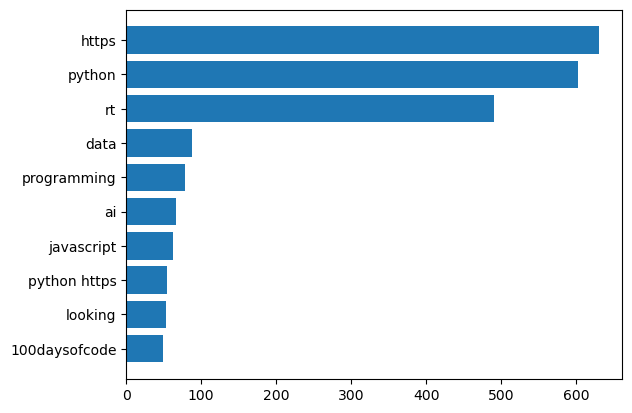

In [10]:
title = '## Stock Price Dashboard'

subtitle = 'This dashboard allows you to select a company and date range to see stock prices.'

# create list of company names (tickers)
tickers = ['AAPL', 'GOOG', 'IBM', 'MSFT']

# this creates the dropdown widget
ticker = pn.widgets.Select(name='Company', options=tickers)

# this creates the date range slider
date_range_slider = pn.widgets.DateRangeSlider(
    name='Date Range Slider',
    start=dt.datetime(2001, 1, 1), end=dt.datetime(2010, 1, 1),
    value=(dt.datetime(2001, 1, 1), dt.datetime(2010, 1, 1))
)

# tell Panel what your plot "depends" on. 
# This defines what should trigger a change in the chart.
# both values in depends() will be used in our below Altair chart as filters
@pn.depends(ticker.param.value, date_range_slider.param.value)
def show_word_bar_chart(data):
    # Plot horizontal bar graph
    data.sort_values(by='Frequency', inplace=True)
    word_bar_chart = plt.barh(data['Word'], data['Frequency'])
    return word_bar_chart


# create the Panel object, passing in all smaller objects

dashboard = pn.Row(
    pn.Column(title, subtitle),
    show_word_bar_chart(WordFreq) # draw chart function!
)

In [13]:
pn.extension('vega')
dashboard.servable()

BokehModel(combine_events=True, render_bundle={'docs_json': {'0b243d19-0a26-4ead-99c2-342a4b96dde7': {'defs': …